<a href="https://colab.research.google.com/github/AbdelnasserMostafa/-myproject/blob/master/TensorFlow_Master_Class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simpoe-Autoencoder

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create Some Data
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

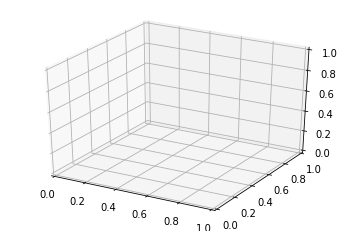

In [ ]:
# Scale the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

# data[0]
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

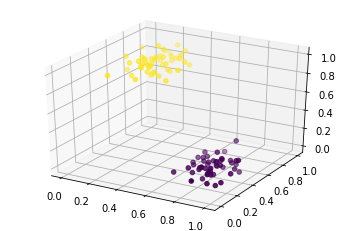

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c=data[1])

In [ ]:
# The Linear Autoencoder
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

num_inputs = 3   # 3 dimensional input
num_hidden = 2   # 2 dimensional representation
num_outputs = num_inputs  # Must be true for an autoencoder!
learning_rate = 0.01

# Placeholder: No there is not real label here, just X.
X = tf.placeholder(tf.float32, shape = [None, num_inputs])

# Layers:  Using the fully_connected layers API, we do not provide an activation function!
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

# Loss Function
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

# Optimizer
Optimizer = tf.train.AdamOptimizer(learning_rate)
train = Optimizer.minimize( loss)

# Init
init = tf.global_variables_initializer()

# Running the Session
num_steps = 1000
with tf.Session() as sess:
  sess.run(init)
  for iteration in range(num_steps):
    sess.run(train, feed_dict = {X: scaled_data})
  # Now ask for the hidden layer output (the 2 dimensional output)
  output_2d = hidden.eval(feed_dict = {X: scaled_data})

In [ ]:
output_2d.shape

(100, 2)

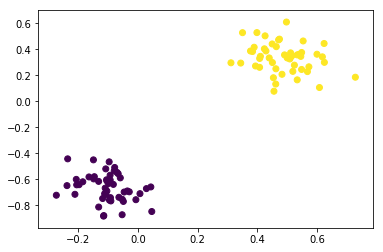

In [ ]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=data[1])

In [ ]:
# Linear Autoencoder for PCA

In [ ]:
# The Data:  Import numpy, matplotlib, and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/rmlowe/Tensorflow-Bootcamp-master.git

fatal: destination path 'Tensorflow-Bootcamp-master' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/Tensorflow-Bootcamp-master/05-Autoencoders/anonymized_data.csv')
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,NVFW,VLBG,IDIX,UVHN,IWOT,LEMB,QMYY,XDGR,ODZS,LNJS,WDRT,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,0.454458,-3.855839,-6.248326,4.934422,10.008317,-4.298336,-8.814638,3.817839,2.896091,-5.350594,4.048589,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,-9.003987,-8.940399,6.156711,9.587159,-6.242118,-3.958827,2.793432,-6.120728,5.127779,-2.374059,4.341376,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,-7.163735,-7.004002,4.678410,9.168494,-7.139517,-4.774317,4.358969,-6.179764,4.207522,0.508184,4.028944,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,1.430195,-0.991499,-5.153022,5.491574,9.525384,-7.426677,-8.496024,2.671595,4.386845,-4.692552,3.974559,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,-1.132032,-3.827855,-5.659445,4.374395,8.222426,-6.008160,-8.804945,4.699459,3.988987,-4.276795,3.799633,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [ ]:
# Scale the Data
# use scikit learning to scale the data with MinMaxScaler. Remember not to scale the Label column. just the data.
# Save this scaled data as a new variable called scaled_data **

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Label',axis=1))

# The Linear Autoencoder:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

# Fill out the number of inputs to fil the dimensions of the data set and set the hidden number on units to be 2.
# Also set the number of outputs to match the number of input.  Also choose a learning_rate value.
num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!
learning_rate = 0.01

# Placeholder: Create a placeholder for the data called X.
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

# Layers: Create the hidded layer and the output laryes using the fully_connected.
# Remember that to perform PCA there is no activation function.
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

# Loss Function: Create a Mean Squared Error loss function
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

# Optimizer: Create an AdamOptimizer designed to minimize the previous loss function
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

# Init:  Create and instance of a global variable initializer
init = tf.global_variables_initializer()

# Running the Session
# Now create a Tensorflow session that runs the optimizer for at least 1000 steps
# You can also use epochs if you prefer, where 1 epoch is defined by one single run through the entire dataset.
num_steps = 1000
with tf.Session() as sess:
    sess.run(init)   
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

  # Now create a session that runs the scaled data through the hidden layer.
  # You could have also done this in the last step after all the training steps
with tf.Session() as sess:
    sess.run(init)
        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

ValueError: ignored

In [ ]:
  # Confirm that your output is now 2 dimensional along the previous axis of 40 features
  output_2d.shape

(100, 2)

In [ ]:
#plt.scatter(output_2d[:,0],output_2d[:,1],c=df['Label'])

In [ ]:
# Stacked Autoencoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
tf.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [ ]:
# Parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs
learning_rate = 0.01

# Activation function
actf =tf.nn.relu

# Placeholder
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

# Weights
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

# Biases
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

# Activation Function and Layers
act_func = tf.nn.relu
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

# Loss Function
loss = tf.reduce_mean(tf.square(output_layer - X))

# Optimizer
# tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# Initialize Variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        # 150 batch size
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver.save(sess, "./stacked_autoencoder.ckpt")      

Epoch 0 Complete. Training Loss: 0.0345628559589386
Epoch 1 Complete. Training Loss: 0.031782474368810654
Epoch 2 Complete. Training Loss: 0.02855057641863823
Epoch 3 Complete. Training Loss: 0.027269773185253143
Epoch 4 Complete. Training Loss: 0.028827544301748276


In [ ]:
# Test Autoencoder output on Test Data
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


ValueError: ignored

NameError: ignored

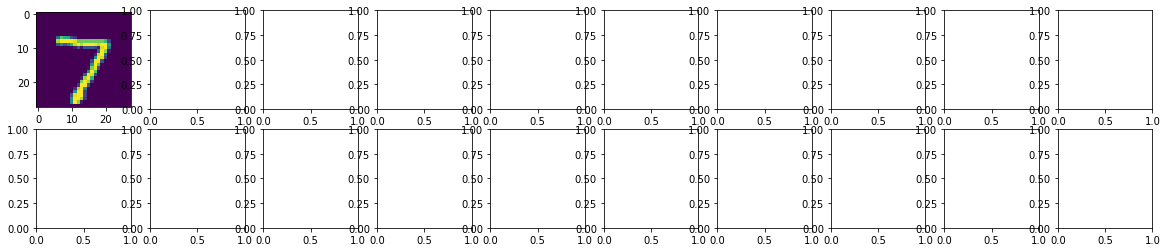

In [ ]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))

In [ ]:
# GAN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


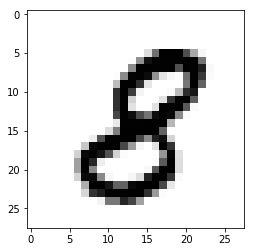

In [ ]:
plt.imshow(mnist.train.images[5].reshape(28, 28), cmap='Greys')

In [ ]:
# The Generator
def generator(z, reuse = None):
  with tf.variable_scope('gen', reuse = reuse):
    hidden1 = tf.layers.dense(inputs = z, units = 128)
    # Leaky ReLu
    alpha = 0.01
    hidden1 = tf.maximum(alpha * hidden1, hidden1)
    hidden2 = tf.layers.dense(inputs = hidden1, units = 128)

    hidden2 = tf.maximum(alpha * hidden2, hidden2)
    output = tf.layers.dense(hidden2, units = 784, activation = tf.nn.tanh)
    return output

  # The Discriminator
  def discriminator(X, reuse = None):
    with tf.variable_scope('dis', reuse = reuse):
      hidden1 = tf.layers.dense(inputs = X, units = 128)
      # Leaky ReLu
      alpha = 0.01
      hidden1 = tf.maximum(alpha * hidden1, hidden1)

      hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
      hidden2 = tf.maximum(alpha * hidden2, hidden2)

      logits = tf.layers.dense(hidden2, units = 1)
      output = tf.sigmoid(logits)

      return output, logits

In [ ]:
# Placeholders
real_images = tf.placeholder(tf.float32, shape = [None, 784])
z = tf.placeholder(tf.float32, shape = [None, 100])

# Generator
G = generator(z)

# Discriminator
D_output_real , D_logits_real = discriminator(real_images)
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

# Losses
def loss_func(logits_in, labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_in, labels=labels_in))

D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real) * (0.9))
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))
D_loss = D_real_loss + D_fake_loss
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

# Optimizers
learning_rate = 0.001
tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]
print([v.name for v in d_vars])
print([v.name for v in g_vars])

D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list = d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list = g_vars)

# Training Session
batch_size = 100
epochs = 500
init = tf.global_variables_initializer()
saver = tf.train.Saver(var_list = g_vars)

# Save a sample per epoch
samples = []

with tf.Session() as sess:
  sess.run(init)
  # Recall on epoch is an entire run through the training data
  for e in range(epochs):
    # // indicates classic division
    num_batches = mnist.train.num_examples // batch_size
    for i in range(num_batches):
      # Graph batch for images
      batch = mnist.train.next_batch(batch_size)
      # Get images, reshape and rescale to pass to D
      batch_images = batch[0].reshape((batch_size, 784))
      batch_images = batch_images * 2 - 1
      # Z (random latent noise data for Generator)
      # -1 to 1 because of tanh activation
      batch_z = np.random.uniform(-1, 1, size = (batch_size, 100))
      # Run optimizers, no need to save outputs, we won't use them
      _ = sess.run(D_trainer, feed_dict = {real_images: batch_images, z: batch_z})
      _ = sess.run(G_trainer, feed_dict = {z: batch_z})
  
  print("Currently on Epoch {} of {} total...".format(e+1, epochs))
  
  # Sample from generator as we're training for viewing afterwords
  sample_z = np.random.uniform(-1, 1, size = (1, 100))
  gen_sample = sess.run(generator(z, reuse = True), feed_dict = {z: sample_z})
  sample.append(gen_sample)

ValueError: ignored

In [ ]:
saver = tf.train.Saver(var_list=g_vars)

new_samples = []
with tf.Session() as sess:
    
    saver.restore(sess,'./models/500_epoch_model.ckpt')
    
    for x in range(5):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
        new_samples.append(gen_sample)

NameError: ignored